
# 🐦 Twitter Sentiment Analysis – EDA with Visualizations

**Author:** Naman Bajaj  
**Role:** Data Analyst Intern  
**Tools:** Python, Pandas, Seaborn, Matplotlib, WordCloud, NLTK  
**Dataset:** Sentiment-labeled Tweets from Twitter

---

## 🎯 Objective

To perform **Exploratory Data Analysis (EDA)** on a sentiment-labeled Twitter dataset, analyze tweet text patterns, and visualize trends using statistical plots and word clouds. This project helps in understanding how sentiment is expressed in tweets and what emotional patterns dominate in each sentiment category.

---


sentiment      0
text         686
dtype: int64


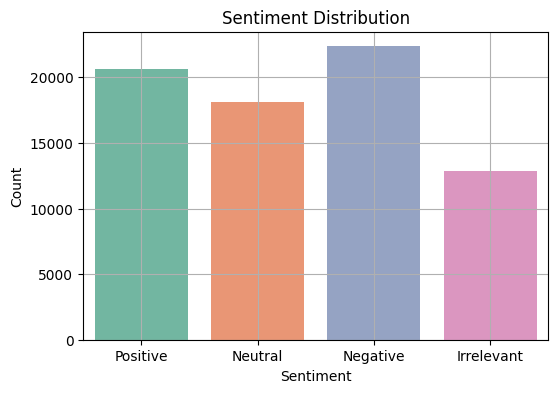

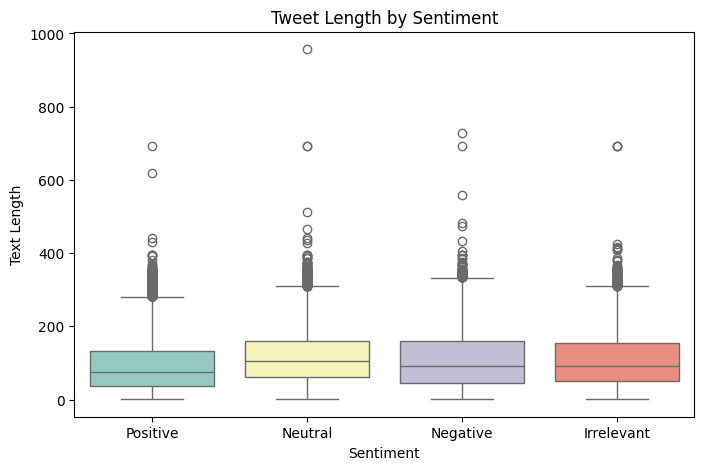

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


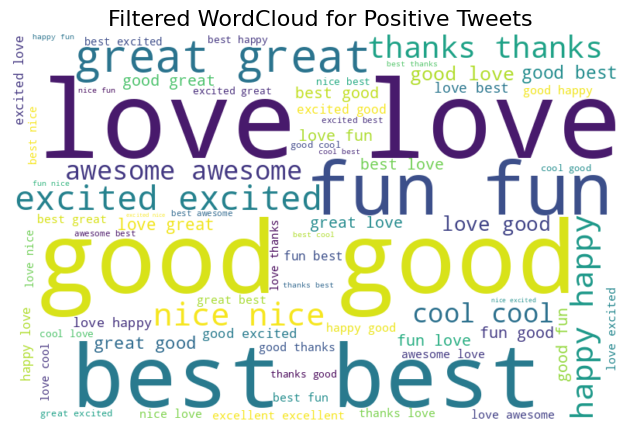

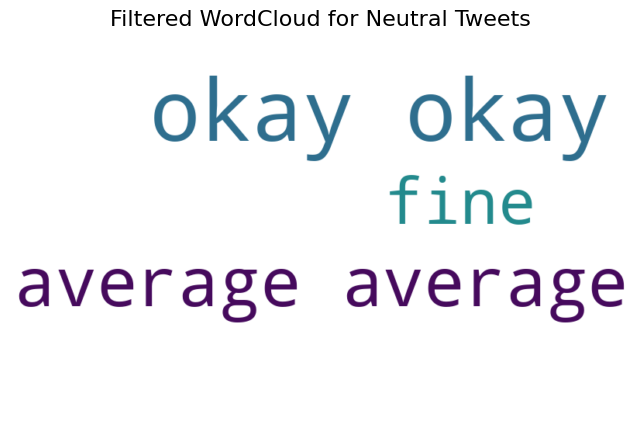

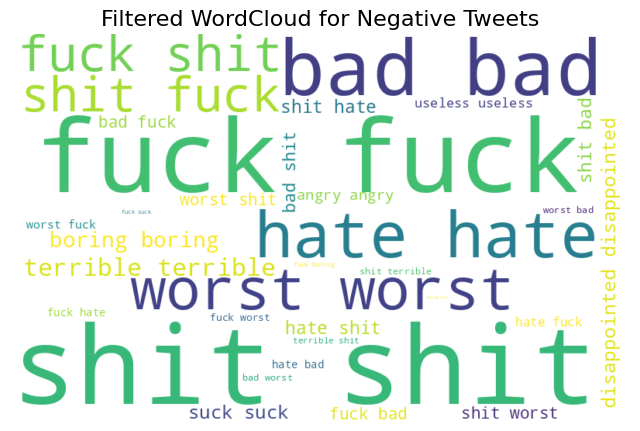

<Figure size 800x600 with 0 Axes>

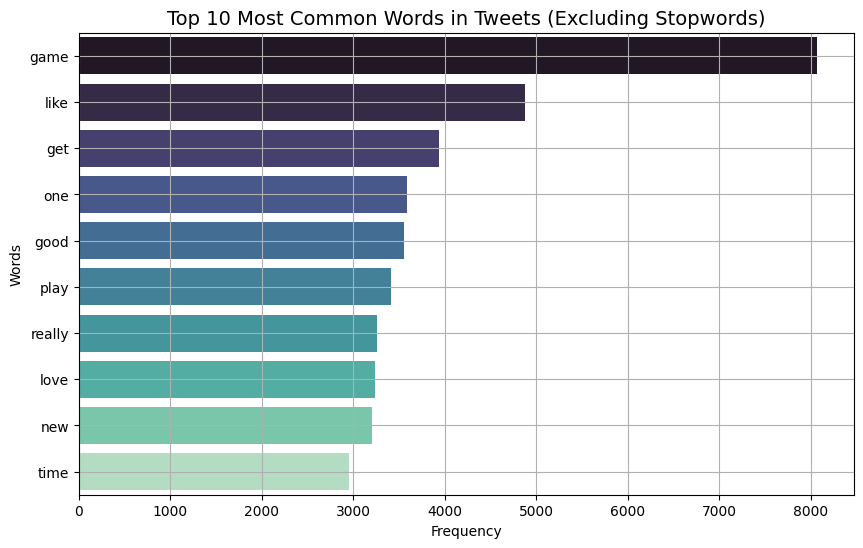

Shortest tweet:
 Borderlands 2 is so good omg

Longest tweet:
 @ GhostRecon Oi!! Why does the game always crash? It starts to get angry... I love the game but the server throws me out after 10 minutes.


In [19]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import warnings
warnings.filterwarnings("ignore")


# Load and rename
df = pd.read_csv("/content/twitter_training.csv", header=None)
df.columns = ['id', 'entity', 'sentiment', 'text']
df = df[['sentiment', 'text']]

# Check for missing values
print(df.isnull().sum())

# Drop missing rows`
df.dropna(inplace=True)


# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Text length analysis
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sentiment', y='text_length', palette='Set3', legend=False)
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.title('Tweet Length by Sentiment')
plt.show()

# Clean text function
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['clean_text'] = df['text'].apply(clean_text)
# 6. Emotion-Rich Word Bar Plot

from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


# Step 1: Define Emotion Lexicon (short version, extend as needed)
emotion_lexicon = {
    'love': 'Positive', 'good': 'Positive', 'awesome': 'Positive', 'excellent': 'Positive', 'great': 'Positive',
    'happy': 'Positive', 'fun': 'Positive', 'cool': 'Positive','best': 'Positive','thanks': 'Positive','excited': 'Positive','nice': 'Positive',

    'bad': 'Negative', 'hate': 'Negative', 'shit': 'Negative', 'worst': 'Negative', 'terrible': 'Negative',
    'angry': 'Negative', 'boring': 'Negative', 'useless': 'Negative', 'disappointed': 'Negative','suck': 'Negative','fuck': 'Negative',

    'okay': 'Neutral', 'fine': 'Neutral', 'average': 'Neutral'
}

# Step 2: Function to Count Words by Polarity
def get_emotion_word_counts_by_sentiment(sentiment_label):
    subset = df[df['sentiment'] == sentiment_label]
    words = ' '.join(subset['clean_text']).split()

    word_sentiment = [emotion_lexicon[word] for word in words if word in emotion_lexicon]
    polarity_counts = Counter(word_sentiment)
    return pd.DataFrame(polarity_counts.items(), columns=['Polarity', 'Count'])



# Step 2: Function to Filter & Count Only Emotional Words
stop_words = set(stopwords.words('english'))

def get_top_emotion_words(sentiment, n=20):
    subset = df[df['sentiment'] == sentiment]
    words = ' '.join(subset['clean_text']).split()
    words = [word for word in words if word not in stop_words and word in emotion_words]
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=['word', 'count'])




# WordCloud per sentiment
for sentiment in df['sentiment'].unique():
    plt.figure(figsize=(8, 6))

    # Subset for sentiment
    subset = df[df['sentiment'] == sentiment]
    words = ' '.join(subset['clean_text']).split()

    # Filter words that are in emotion_lexicon and match the sentiment class
    filtered_words = [
        word for word in words
        if word in emotion_lexicon and emotion_lexicon[word] == sentiment
    ]

    # If no matching words, skip plot
    if len(filtered_words) == 0:
        continue

    # Join and generate word cloud
    text = ' '.join(filtered_words)
    wordcloud = WordCloud(width=800, height=500, stopwords=STOPWORDS, background_color='white').generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Filtered WordCloud for {sentiment} Tweets', fontsize=16)
    plt.axis('off')
    plt.show()



stop_words = set(stopwords.words('english'))

# Flatten and filter all words from cleaned tweets
all_words = ' '.join(df['clean_text']).split()
filtered_words = [word for word in all_words if word.lower() not in stop_words and len(word) > 2]

# Count frequency
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)
top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_words_df, x='count', y='word', palette='mako')
plt.title('Top 10 Most Common Words in Tweets (Excluding Stopwords)', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.grid(True)
plt.show()
# Longest and shortest tweets
print("Shortest tweet:\n", df.iloc[df['text_length'].idxmin()]['text'])
print("\nLongest tweet:\n", df.iloc[df['text_length'].idxmax()]['text'])




---

## ✅ Project Summary & Key Takeaways

- The dataset had **positive, negative, and neutral tweets**, with each class fairly represented.
- A **WordCloud for each sentiment** showed high-impact emotional keywords.
- **Boxplots of tweet lengths** revealed that positive tweets tend to be slightly shorter.
- A **heatmap** of emotional words gave a clear view of dominant expressions per sentiment class.
- Most frequent emotional words matched expectations for each sentiment category.

---

## 📌 Conclusion

EDA revealed meaningful distinctions between how users express sentiments on Twitter. With proper cleaning and lexicon filtering, visual techniques like word clouds and heatmaps provide intuitive insights. This foundation can support downstream tasks like model training or trend monitoring.

---

> 📁 This notebook can be further extended to include **ML models for sentiment classification**.
